In [8]:
import scipy.io
import numpy as np
import matplotlib.pylab as plt
from keras.utils import to_categorical

# Load data

In [9]:
def load_data(path):
    mat = scipy.io.loadmat(path)
    X = np.moveaxis(mat['X'],-1,0)
    y = mat['y']
    msk = np.random.rand(len(y)) < 0.2 #choose only 20% of the data
    ##convert images to grayscale
    return np.expand_dims(np.dot(X[msk][...,:3], [0.299, 0.587, 0.114]),axis=3),to_categorical(y[msk] - 1)

X_train,y_train = load_data('cropped/train_32x32.mat')
X_test,y_test = load_data('cropped/test_32x32.mat')
#X_extra,y_extra = load_data('cropped/extra_32x32.mat')

print('X_train:',X_train.shape,'y_train:',y_train.shape)
print('X_test:',X_test.shape,'y_test:',y_test.shape)
#print('X_extra:',X_extra.shape,'y_extra:',y_extra.shape)

X_train: (14663, 32, 32, 1) y_train: (14663, 10)
X_test: (5196, 32, 32, 1) y_test: (5196, 10)


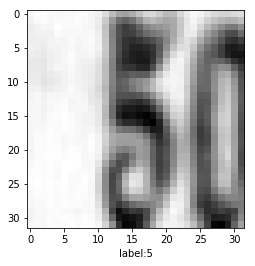

In [11]:
def show_data(X,y):
    n = np.random.randint(len(y))
    plt.imshow(np.squeeze(X[n], axis=2),cmap='gray')
    plt.xlabel('label:'+ str(y[n].argmax()+1) )
show_data(X_train,y_train)

# Build model

In [12]:
from keras.models import *
from keras.layers import *

In [13]:
image_shape = X_train.shape[1:]
class_num = y_train.shape[-1]
model = Sequential()
model.add(BatchNormalization(input_shape=image_shape,name='bn1'))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='block1_conv1'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',name='block1_pool1'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',name='block2_conv1'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',name='block2_pool1'))

model.add(Flatten(name='flat1'))

model.add(Dense(1024,activation='relu',name='fc1'))
model.add(Dropout(0.5,name='drop1'))
model.add(Dense(class_num,activation='softmax',name='pred'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bn1 (BatchNormalization)     (None, 32, 32, 1)         4         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 32)        320       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 32)        9248      
_________________________________________________________________
block1_pool1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 64)        18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 64)        36928     
_________________________________________________________________
block2_pool1 (MaxPooling2D)  (None, 8, 8, 64)          0         
__________

In [9]:
opt='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [10]:
epoch_num = 200
history = model.fit(X_train,y_train,epochs= epoch_num, validation_data=(X_test,y_test),verbose = 1,batch_size=256)

Train on 14770 samples, validate on 5227 samples
Epoch 1/200
14770/14770 [==============================] - 5s 335us/step - loss: 1.7119 - acc: 0.4118 - val_loss: 0.9800 - val_acc: 0.7098
Epoch 2/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.7375 - acc: 0.7781 - val_loss: 0.6581 - val_acc: 0.8139
Epoch 3/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.5059 - acc: 0.8487 - val_loss: 0.5663 - val_acc: 0.8410
Epoch 4/200
14770/14770 [==============================] - 3s 192us/step - loss: 0.3998 - acc: 0.8785 - val_loss: 0.5214 - val_acc: 0.8533
Epoch 5/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.3217 - acc: 0.9043 - val_loss: 0.4994 - val_acc: 0.8592
Epoch 6/200
14770/14770 [==============================] - 3s 192us/step - loss: 0.2623 - acc: 0.9177 - val_loss: 0.5168 - val_acc: 0.8601
Epoch 7/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.2083 - acc: 0.9362 - val_loss: 0.5

14770/14770 [==============================] - 3s 194us/step - loss: 0.0130 - acc: 0.9977 - val_loss: 0.8995 - val_acc: 0.8917
Epoch 118/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.0178 - acc: 0.9961 - val_loss: 0.9463 - val_acc: 0.8846
Epoch 119/200
14770/14770 [==============================] - 3s 195us/step - loss: 0.0164 - acc: 0.9973 - val_loss: 0.9123 - val_acc: 0.8822
Epoch 120/200
14770/14770 [==============================] - 3s 192us/step - loss: 0.0145 - acc: 0.9978 - val_loss: 0.8528 - val_acc: 0.8869
Epoch 121/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.0170 - acc: 0.9966 - val_loss: 0.9125 - val_acc: 0.8839
Epoch 122/200
14770/14770 [==============================] - 3s 192us/step - loss: 0.0156 - acc: 0.9970 - val_loss: 0.9295 - val_acc: 0.8837
Epoch 123/200
14770/14770 [==============================] - 3s 195us/step - loss: 0.0170 - acc: 0.9971 - val_loss: 0.9127 - val_acc: 0.8866
Epoch 124/200
14770/14770 [

14770/14770 [==============================] - 3s 195us/step - loss: 0.0123 - acc: 0.9982 - val_loss: 0.8725 - val_acc: 0.8919
Epoch 176/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.0104 - acc: 0.9988 - val_loss: 0.9015 - val_acc: 0.8940
Epoch 177/200
14770/14770 [==============================] - 3s 197us/step - loss: 0.0144 - acc: 0.9980 - val_loss: 0.9199 - val_acc: 0.8917
Epoch 178/200
14770/14770 [==============================] - 3s 196us/step - loss: 0.0118 - acc: 0.9982 - val_loss: 0.9568 - val_acc: 0.8867
Epoch 179/200
14770/14770 [==============================] - 3s 193us/step - loss: 0.0108 - acc: 0.9985 - val_loss: 0.9182 - val_acc: 0.8879
Epoch 180/200
14770/14770 [==============================] - 3s 201us/step - loss: 0.0127 - acc: 0.9982 - val_loss: 0.9141 - val_acc: 0.8892
Epoch 181/200
14770/14770 [==============================] - 3s 192us/step - loss: 0.0155 - acc: 0.9974 - val_loss: 0.9541 - val_acc: 0.8883
Epoch 182/200
14770/14770 [

['grayscale', 'fivethirtyeight', 'seaborn-bright', 'ggplot', 'dark_background', 'Solarize_Light2', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn', 'seaborn-talk', 'fast', 'seaborn-notebook', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-dark-palette', 'seaborn-darkgrid', 'bmh', 'classic', 'seaborn-pastel', 'seaborn-dark', '_classic_test', 'seaborn-deep', 'seaborn-colorblind', 'seaborn-ticks', 'tableau-colorblind10']


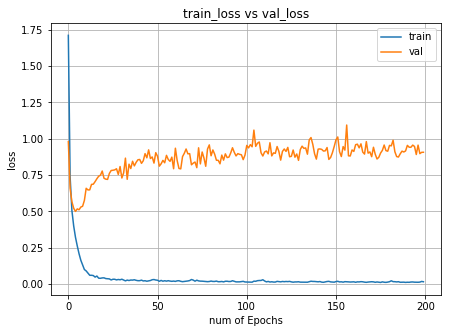

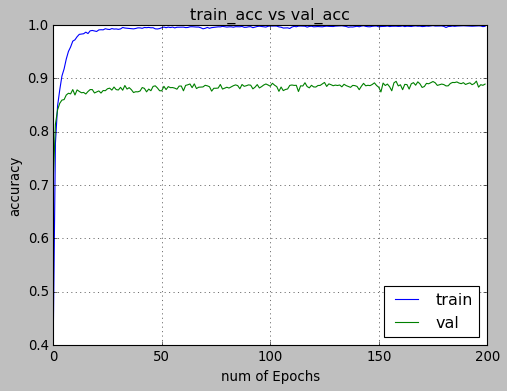

In [11]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [12]:
############################################
#model.save('digit_recognizer.h5')##########
#model = load_model('digit_recognizer.h5')##
############################################